# Tratamento de dados

In [92]:
import pandas as pd
import matplotlib.pyplot as plt

In [93]:
tabela = pd.read_excel("Desafio Inteligência 1.xlsx", sheet_name="Base")
tabela.head()

,CONTRATO,DATA DA CRIACAO,DIARIAS,VALOR TOTAL,ORIGEM
0,Loja 11000,2022-12-19,7,1933.88,SITE
1,Loja 21001,2022-07-28,4,748.15,APLICATIVO
2,Loja 11002,2023-08-20,6,459.04,PARCEIRO 1
3,Loja 11003,2022-03-24,10,1079.76,PARCEIRO 2
4,Loja 31004,2022-05-13,1,202.03,SITE


In [94]:
tabela.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54536 entries, 0 to 54535
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   CONTRATO         54536 non-null  object        
 1   DATA DA CRIACAO  54536 non-null  datetime64[ns]
 2   DIARIAS          54536 non-null  int64         
 3   VALOR TOTAL      54536 non-null  float64       
 4   ORIGEM           54536 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 2.1+ MB


In [95]:
# Contar reservas por data
reservas_por_dia = tabela.groupby("DATA DA CRIACAO").size().rename("QUANTIDADE_RESERVAS")

# Criar série temporal
reservas_por_dia = reservas_por_dia.asfreq("D").fillna(0)  # Garantir frequência diária

In [96]:
print(reservas_por_dia)

DATA DA CRIACAO
2022-01-01     7
2022-01-02    38
2022-01-03    58
2022-01-04    36
2022-01-05    23
              ..
2024-11-24    62
2024-11-25    62
2024-11-26    68
2024-11-27    71
2024-11-28    81
Freq: D, Name: QUANTIDADE_RESERVAS, Length: 1063, dtype: int64


In [97]:
# Agregar para o nível mensal (somar as reservas por mês)
reservas_por_mes = reservas_por_dia.resample('M').sum()

# Visualizar as reservas mensais
print(reservas_por_mes.head())

DATA DA CRIACAO
2022-01-31     987
2022-02-28    1167
2022-03-31    1243
2022-04-30    1278
2022-05-31    1207
Freq: ME, Name: QUANTIDADE_RESERVAS, dtype: int64


C:\Users\victo\AppData\Local\Temp\ipykernel_14396\1493720816.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  reservas_por_mes = reservas_por_dia.resample('M').sum()


In [98]:
print(reservas_por_mes.head(40))

DATA DA CRIACAO
2022-01-31     987
2022-02-28    1167
2022-03-31    1243
2022-04-30    1278
2022-05-31    1207
2022-06-30    1248
2022-07-31    1262
2022-08-31    1362
2022-09-30    1262
2022-10-31    1309
2022-11-30    1381
2022-12-31    1644
2023-01-31    1595
2023-02-28    1508
2023-03-31    1670
2023-04-30    1524
2023-05-31    1426
2023-06-30    1448
2023-07-31    1471
2023-08-31    1677
2023-09-30    1719
2023-10-31    1603
2023-11-30    1618
2023-12-31    1617
2024-01-31    1562
2024-02-29    1876
2024-03-31    1948
2024-04-30    1698
2024-05-31    1757
2024-06-30    1618
2024-07-31    1685
2024-08-31    1966
2024-09-30    1874
2024-10-31    2092
2024-11-30    2234
Freq: ME, Name: QUANTIDADE_RESERVAS, dtype: int64


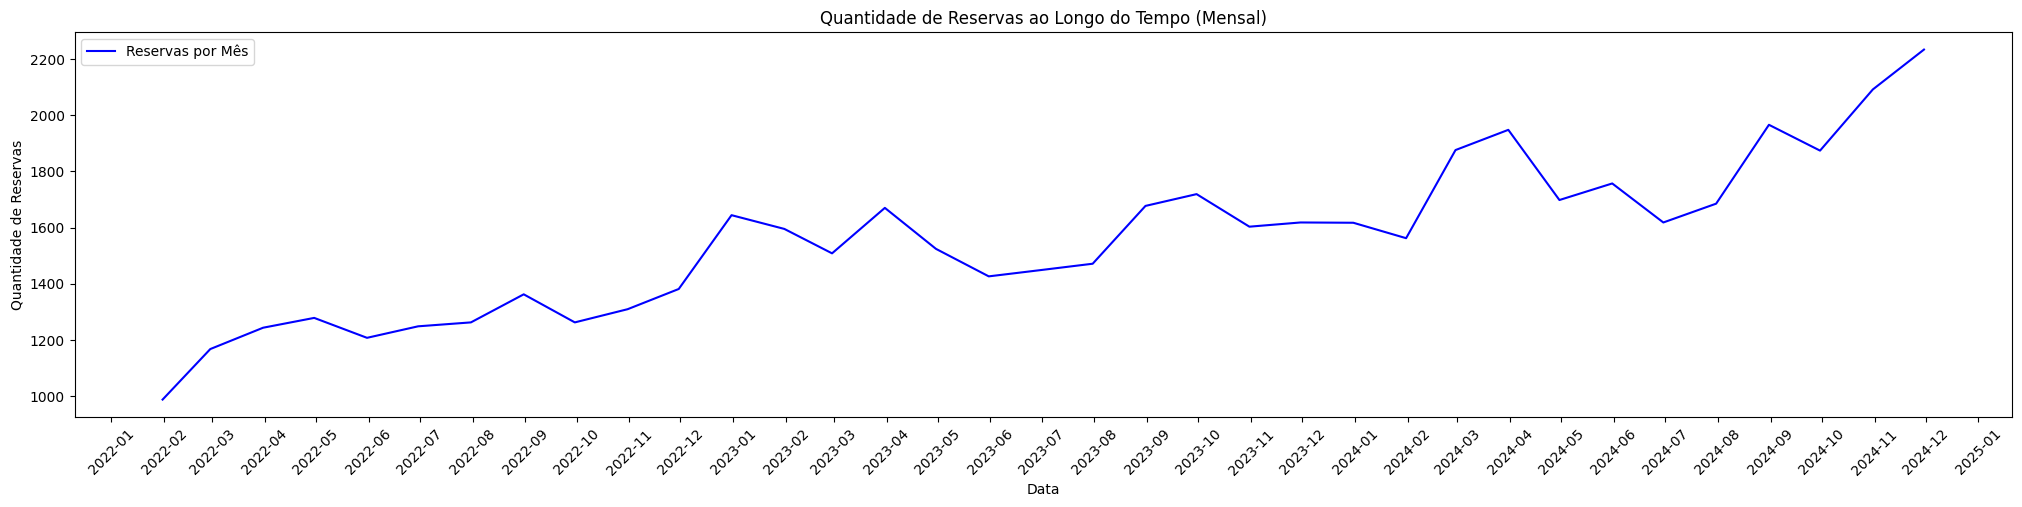

In [99]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Criar figura
plt.figure(figsize=(25, 5))

# Plotar a série temporal mensal
plt.plot(reservas_por_mes, label="Reservas por Mês", color="blue")

# Formatar eixo x para mostrar por mês
plt.xlabel("Data")
plt.ylabel("Quantidade de Reservas")
plt.title("Quantidade de Reservas ao Longo do Tempo (Mensal)")
plt.legend()

# Ajustar rótulos do eixo x para mostrar todos os meses
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Exibe uma tick para cada mês
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))  # Formato ano-mês (ex: 2023-01)
plt.xticks(rotation=45)  # Rotacionar os rótulos para melhor leitura

# Exibir o gráfico
plt.show()


<Figure size 2000x1000 with 0 Axes>

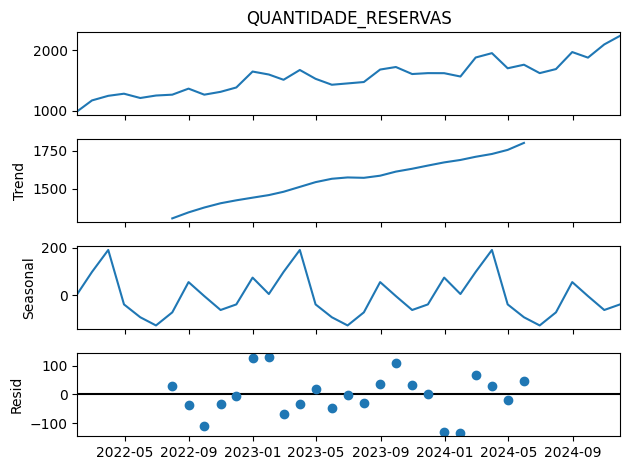

In [100]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Decomposição aditiva com dados mensais e período de sazonalidade anual (12 meses)
decomp = seasonal_decompose(reservas_por_mes, model="additive", period=12)

# Ajustando o tamanho da figura
plt.figure(figsize=(20, 10))  # Ajuste o tamanho conforme necessário

# Plotar os componentes
decomp.plot()

# Ajuste de layout para evitar sobreposição de gráficos
plt.tight_layout()

# Exibir o gráfico
plt.show()


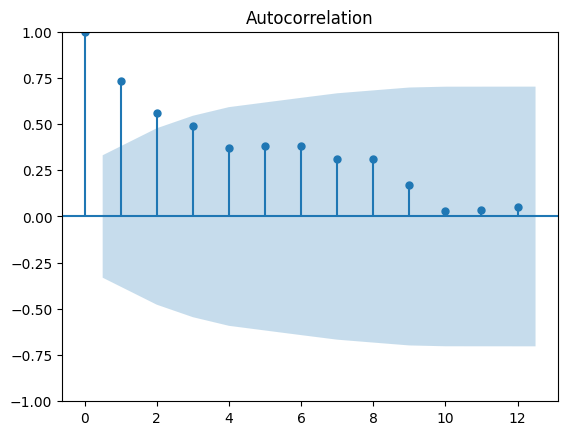

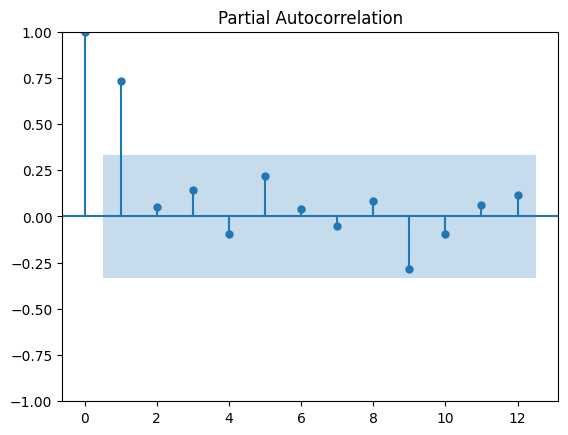

In [101]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plotar autocorrelação (por exemplo, 12 lags para uma sazonalidade anual)
plot_acf(reservas_por_mes, lags=12)
plt.show()

# Plotar autocorrelação parcial (por exemplo, 12 lags para uma sazonalidade anual)
plot_pacf(reservas_por_mes, lags=12)
plt.show()



In [102]:
# teste estatístico  para verificar se uma série temporal é estacionária
from statsmodels.tsa.stattools import adfuller

result = adfuller(reservas_por_mes)
print('Valor p:', result[1])


Valor p: 0.9261065143640297


Tem tendencia e não é estacionária

# Criação SARIMA

C:\Users\victo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\victo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                       
Dep. Variable:                  QUANTIDADE_RESERVAS   No. Observations:                   35
Model:             SARIMAX(2, 1, 2)x(1, 1, [1], 12)   Log Likelihood                -139.978
Date:                              Tue, 18 Mar 2025   AIC                            293.956
Time:                                      01:36:40   BIC                            301.593
Sample:                                  01-31-2022   HQIC                           295.755
                                       - 11-30-2024                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1173      0.675     -0.174      0.862      -1.441       1.207
ar.L2          0.32

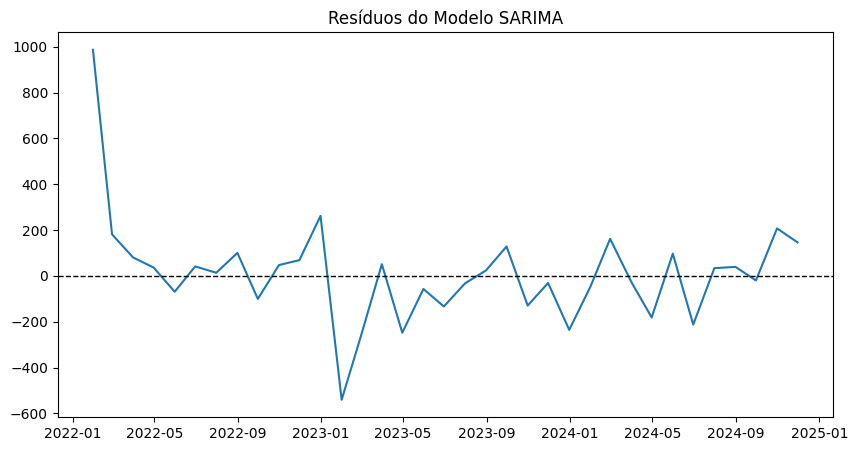

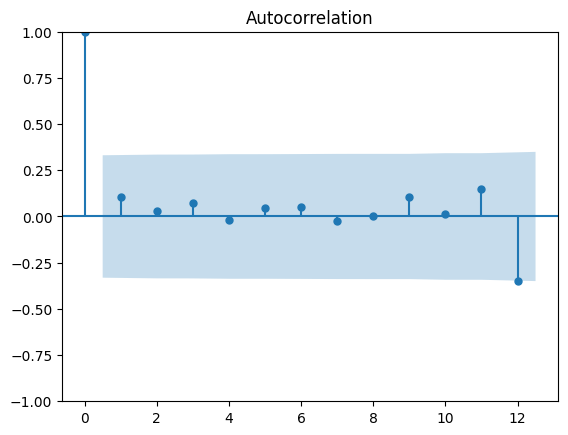

C:\Users\victo\AppData\Local\Temp\ipykernel_14396\4101125741.py:40: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  datas_futuras = pd.date_range(reservas_por_mes.index[-1] + pd.DateOffset(months=1), periods=12, freq='M')



Previsões para os próximos 12 meses:
                 Data  Previsão  IC Inferior  IC Superior
2024-12-31 2024-12-31   2295.81      2067.09      2524.54
2025-01-31 2025-01-31   2165.96      1893.72      2438.20
2025-02-28 2025-02-28   2207.04      1927.91      2486.17
2025-03-31 2025-03-31   2326.31      2041.88      2610.75
2025-04-30 2025-04-30   2045.77      1760.40      2331.14
2025-05-31 2025-05-31   2031.58      1745.18      2317.98
2025-06-30 2025-06-30   1944.98      1658.36      2231.60
2025-07-31 2025-07-31   1997.46      1710.54      2284.39
2025-08-31 2025-08-31   2284.71      1997.58      2571.85
2025-09-30 2025-09-30   2294.32      2006.92      2581.72
2025-10-31 2025-10-31   2323.23      2035.31      2611.16
2025-11-30 2025-11-30   2397.29      2108.72      2685.86


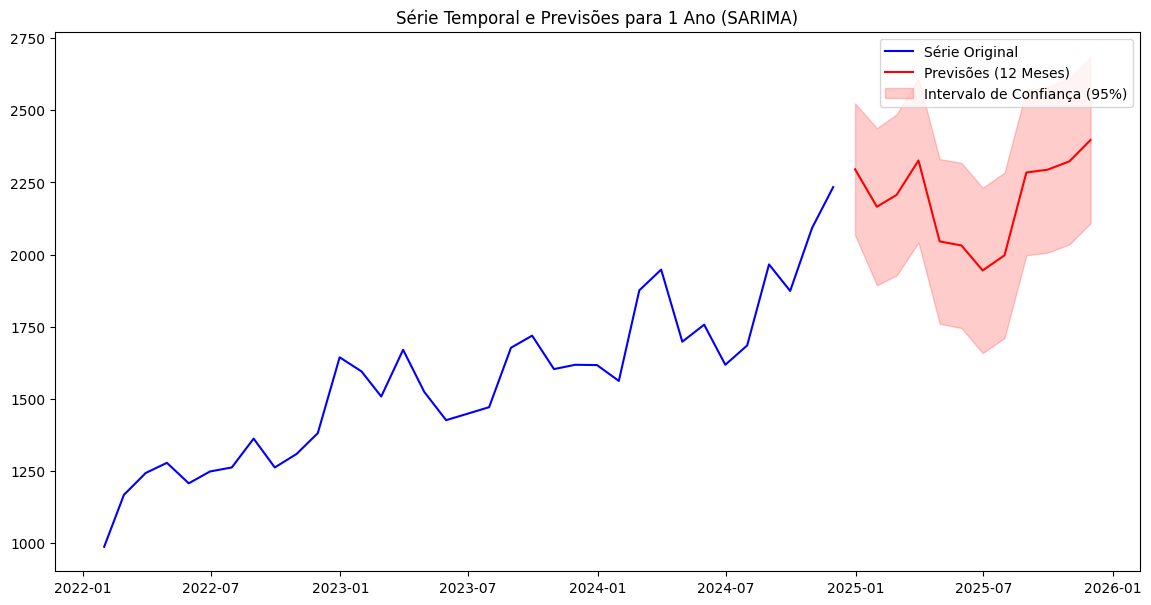

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf

# Ajustando o modelo SARIMA para dados mensais
modelo_sarima = SARIMAX(reservas_por_mes, 
                        order=(2, 1, 2),        # Parâmetros ARIMA (p, d, q)
                        seasonal_order=(1, 1, 1, 12))  # Parâmetros sazonais (P, D, Q, s=12 para sazonalidade anual)

# Ajustando o modelo
modelo_ajustado = modelo_sarima.fit()

# Visualizar o resumo do modelo ajustado
print(modelo_ajustado.summary())

# Plotar os resíduos para verificar o ajuste do modelo
residuos = modelo_ajustado.resid.dropna()  # Remove NaNs
plt.figure(figsize=(10, 5))
plt.plot(residuos)
plt.axhline(y=0, color='black', linestyle='dashed', linewidth=1)
plt.title("Resíduos do Modelo SARIMA")
plt.show()

# Plotar o ACF dos resíduos
plot_acf(residuos, lags=12)  # Como é mensal, 12 lags cobrem um ano
plt.show()

# Fazer previsões para os próximos 12 meses com intervalo de confiança
previsao = modelo_ajustado.get_forecast(steps=12)
previsao_ano = previsao.predicted_mean  

# Obter intervalos de confiança (95% por padrão) 
ic = previsao.conf_int()  
ic_inf = ic.iloc[:, 0]  # Primeira coluna (limite inferior)
ic_sup = ic.iloc[:, 1]  # Segunda coluna (limite superior)

# Criar datas futuras a partir do último índice da série original
datas_futuras = pd.date_range(reservas_por_mes.index[-1] + pd.DateOffset(months=1), periods=12, freq='M')

# Exibir previsões com intervalo de confiança
previsoes_df = pd.DataFrame({
    "Data": datas_futuras,
    "Previsão": previsao_ano,
    "IC Inferior": ic_inf,
    "IC Superior": ic_sup
})
print("\nPrevisões para os próximos 12 meses:")
print(previsoes_df.round(2).head(12))

# Plotar a série original e as previsões com intervalo de confiança
plt.figure(figsize=(14, 7))
plt.plot(reservas_por_mes, label='Série Original', color='blue')
plt.plot(datas_futuras, previsao_ano, label='Previsões (12 Meses)', color='red')

# Adicionar intervalo de confiança (sombreado)
plt.fill_between(datas_futuras, ic_inf, ic_sup, color='red', alpha=0.2, label='Intervalo de Confiança (95%)')

plt.title("Série Temporal e Previsões para 1 Ano (SARIMA)")
plt.legend()
plt.show()


In [104]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Criar previsões dentro da amostra (in-sample) para comparação com valores reais
previsoes_in_sample = modelo_ajustado.fittedvalues

# Remover os primeiros valores onde a diferenciação pode ter gerado NaN
y_true = reservas_por_mes.iloc[1:]  # Ajustar para bater com previsões
y_pred = previsoes_in_sample.iloc[1:]

# Cálculo das métricas
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Exibir as métricas
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")


MAE: 119.17
MSE: 25486.04
RMSE: 159.64
MAPE: 7.60%


# Testando hiperparametros

In [112]:
from itertools import product
import numpy as np
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Definindo o grid de hiperparâmetros para testar
p_values = [0, 1, 2, 3]  # Valores para o parâmetro p (AR)
d_values = [0, 1]        # Valores para o parâmetro d (Diferenciação)
q_values = [0, 1, 2]     # Valores para o parâmetro q (MA)

P_values = [0, 1, 2]     # Valores para o parâmetro sazonal P
D_values = [0, 1]        # Valores para o parâmetro sazonal D
Q_values = [0, 1, 2]     # Valores para o parâmetro sazonal Q
s_values = [12]          # Sazonalidade anual (12 meses)

# Gerar todas as combinações possíveis de hiperparâmetros
param_grid = list(product(p_values, d_values, q_values, P_values, D_values, Q_values, s_values))

# Armazenar os resultados
resultados = []

# Função para calcular as métricas de erro
def calcular_metricas(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return mae, mse, rmse, mape

# Testar todas as combinações de parâmetros
for params in param_grid:
    p, d, q, P, D, Q, s = params
    
    try:
        # Ajuste do modelo SARIMA
        modelo_sarima = SARIMAX(reservas_por_mes, 
                                order=(p, d, q), 
                                seasonal_order=(P, D, Q, s))
        modelo_ajustado = modelo_sarima.fit(disp=False)  # Ajustando o modelo

        # Gerar previsões para o in-sample
        previsoes_in_sample = modelo_ajustado.fittedvalues
        
        # Remover os primeiros valores onde a diferenciação pode ter gerado NaN
        y_true = reservas_por_mes.iloc[1:]  # Ajustar para bater com previsões
        y_pred = previsoes_in_sample.iloc[1:]

        # Calcular as métricas
        mae, mse, rmse, mape = calcular_metricas(y_true, y_pred)

        # Armazenar os resultados e métricas
        resultados.append((params, mae, mse, rmse, mape))
        
    except Exception as e:
        # Se ocorrer um erro durante o ajuste do modelo, ignora
        pass

# Ordenar os resultados para escolher a melhor combinação com base no MAPE (ou outra métrica)
resultados_ordenados = sorted(resultados, key=lambda x: x[4])  # Ordenando por MAPE (índice 4)

# Exibir os melhores resultados
print("\nMelhores combinações de parâmetros:")
for resultado in resultados_ordenados[:5]:  # Exibir as 5 melhores combinações
    params, mae, mse, rmse, mape = resultado
    print(f"Parâmetros: {params} | MAE: {mae:.2f} | MSE: {mse:.2f} | RMSE: {rmse:.2f} | MAPE: {mape:.2f}%")


C:\Users\victo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\victo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\victo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to e


Melhores combinações de parâmetros:
Parâmetros: (3, 1, 2, 2, 0, 1, 12) | MAE: 89.34 | MSE: 11917.39 | RMSE: 109.17 | MAPE: 5.81%
Parâmetros: (3, 1, 2, 2, 0, 0, 12) | MAE: 89.48 | MSE: 11924.40 | RMSE: 109.20 | MAPE: 5.81%
Parâmetros: (2, 1, 2, 2, 0, 0, 12) | MAE: 90.90 | MSE: 12067.61 | RMSE: 109.85 | MAPE: 5.88%
Parâmetros: (2, 1, 2, 1, 0, 2, 12) | MAE: 90.57 | MSE: 12710.08 | RMSE: 112.74 | MAPE: 5.88%
Parâmetros: (2, 1, 2, 2, 0, 2, 12) | MAE: 91.08 | MSE: 12073.45 | RMSE: 109.88 | MAPE: 5.89%


C:\Users\victo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


# Refazendo modelo hiperajustado

C:\Users\victo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\victo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                       
Dep. Variable:                  QUANTIDADE_RESERVAS   No. Observations:                   35
Model:             SARIMAX(3, 1, 2)x(2, 0, [1], 12)   Log Likelihood                -208.338
Date:                              Tue, 18 Mar 2025   AIC                            434.676
Time:                                      02:22:42   BIC                            448.413
Sample:                                  01-31-2022   HQIC                           439.360
                                       - 11-30-2024                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.1614      0.289     -4.021      0.000      -1.727      -0.595
ar.L2         -0.84

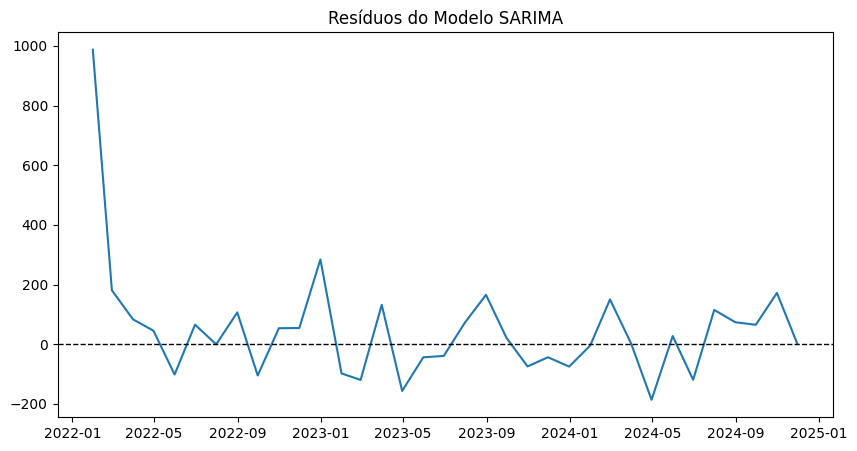

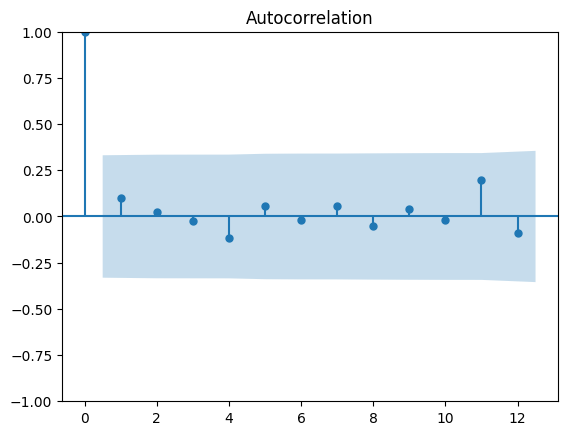

C:\Users\victo\AppData\Local\Temp\ipykernel_14396\4109070434.py:40: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  datas_futuras = pd.date_range(reservas_por_mes.index[-1] + pd.DateOffset(months=1), periods=12, freq='M')
C:\Users\victo\AppData\Local\Temp\ipykernel_14396\4109070434.py:65: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  todas_datas = pd.date_range(reservas_por_mes.index[0], datas_futuras[-1], freq='M')



Previsões para os próximos 12 meses:
                 Data  Previsão  IC Inferior  IC Superior
2024-12-31 2024-12-31   2260.61      2082.88      2438.33
2025-01-31 2025-01-31   2314.61      2050.23      2578.99
2025-02-28 2025-02-28   2287.09      1966.57      2607.62
2025-03-31 2025-03-31   2268.39      1892.42      2644.35
2025-04-30 2025-04-30   2257.17      1838.96      2675.38
2025-05-31 2025-05-31   2143.96      1686.55      2601.37
2025-06-30 2025-06-30   2058.60      1561.00      2556.19
2025-07-31 2025-07-31   2238.23      1708.99      2767.47
2025-08-31 2025-08-31   2273.54      1711.33      2835.76
2025-09-30 2025-09-30   2339.11      1744.66      2933.57
2025-10-31 2025-10-31   2413.07      1792.15      3033.99
2025-11-30 2025-11-30   2279.16      1628.72      2929.59


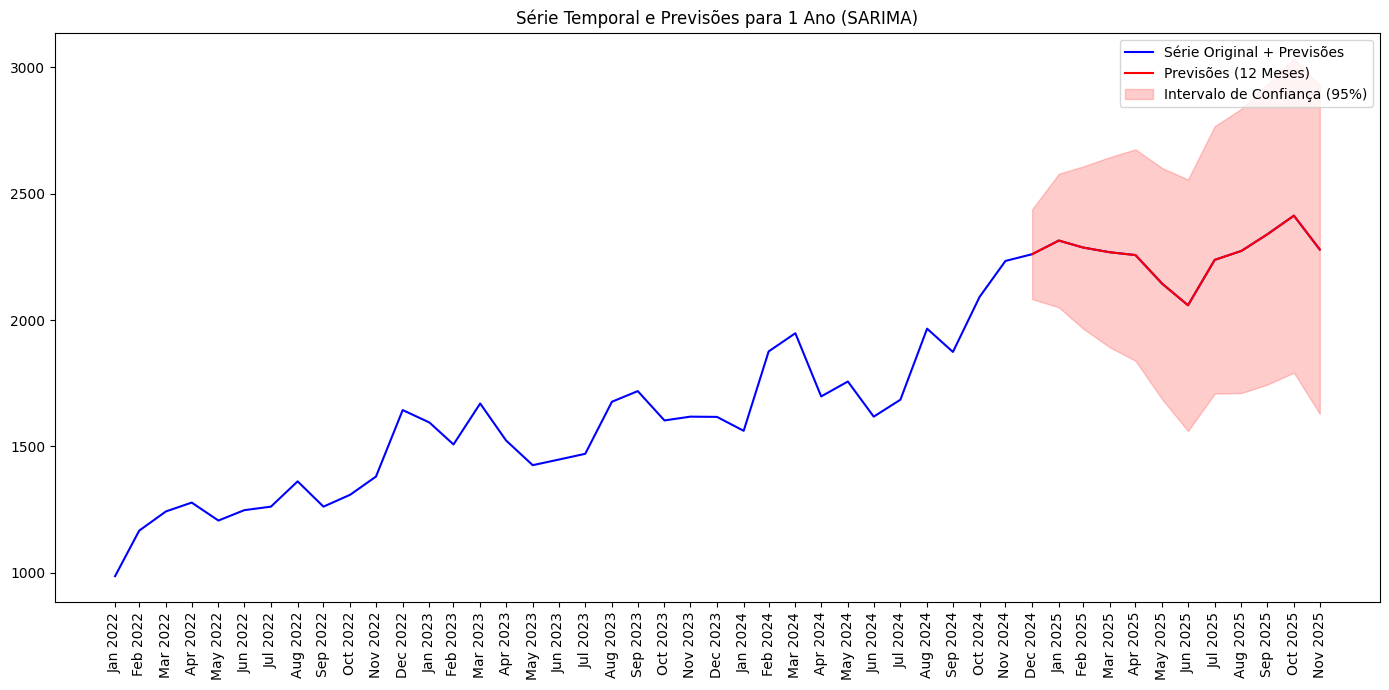

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf

# Ajustando o modelo SARIMA para dados mensais
modelo_sarima = SARIMAX(reservas_por_mes, 
                        order=(3,1,2),        # Parâmetros ARIMA (p, d, q)
                        seasonal_order=(2, 0, 1, 12))  # Parâmetros sazonais (P, D, Q, s=12 para sazonalidade anual)

# Ajustando o modelo
modelo_ajustado = modelo_sarima.fit()

# Visualizar o resumo do modelo ajustado
print(modelo_ajustado.summary())

# Plotar os resíduos para verificar o ajuste do modelo
residuos = modelo_ajustado.resid.dropna()  # Remove NaNs
plt.figure(figsize=(10, 5))
plt.plot(residuos)
plt.axhline(y=0, color='black', linestyle='dashed', linewidth=1)
plt.title("Resíduos do Modelo SARIMA")
plt.show()

# Plotar o ACF dos resíduos
plot_acf(residuos, lags=12)  # Como é mensal, 12 lags cobrem um ano
plt.show()

# Fazer previsões para os próximos 12 meses com intervalo de confiança
previsao = modelo_ajustado.get_forecast(steps=12)
previsao_ano = previsao.predicted_mean  

# Obter intervalos de confiança (95% por padrão)
ic = previsao.conf_int()  
ic_inf = ic.iloc[:, 0]  # Primeira coluna (limite inferior)
ic_sup = ic.iloc[:, 1]  # Segunda coluna (limite superior)

# Criar datas futuras a partir do último índice da série original
datas_futuras = pd.date_range(reservas_por_mes.index[-1] + pd.DateOffset(months=1), periods=12, freq='M')

# Exibir previsões com intervalo de confiança
previsoes_df = pd.DataFrame({
    "Data": datas_futuras,
    "Previsão": previsao_ano,
    "IC Inferior": ic_inf,
    "IC Superior": ic_sup
})
print("\nPrevisões para os próximos 12 meses:")
print(previsoes_df.round(2).head(12))

# Concatenar os dados históricos com as previsões
dados_completos = pd.concat([reservas_por_mes, previsao_ano], axis=0)
intervalo_confiança_completo = pd.concat([ic_inf, ic_sup], axis=0)

# Plotar a série original e as previsões com intervalo de confiança
plt.figure(figsize=(14, 7))
plt.plot(dados_completos, label='Série Original + Previsões', color='blue')
plt.plot(datas_futuras, previsao_ano, label='Previsões (12 Meses)', color='red')

# Adicionar intervalo de confiança (sombreado)
plt.fill_between(datas_futuras, ic_inf, ic_sup, color='red', alpha=0.2, label='Intervalo de Confiança (95%)')

# Detalhar mais o eixo X e colocar os meses em intervalos menores para toda a série
todas_datas = pd.date_range(reservas_por_mes.index[0], datas_futuras[-1], freq='M')
plt.xticks(todas_datas, [d.strftime('%b %Y') for d in todas_datas], rotation=90)  # Ticks verticais e formato de mês/ano

plt.title("Série Temporal e Previsões para 1 Ano (SARIMA)")
plt.legend()
plt.tight_layout()  # Ajusta o layout para evitar sobreposição de elementos
plt.show()


In [114]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Criar previsões dentro da amostra (in-sample) para comparação com valores reais
previsoes_in_sample = modelo_ajustado.fittedvalues

# Remover os primeiros valores onde a diferenciação pode ter gerado NaN
y_true = reservas_por_mes.iloc[1:]  # Ajustar para bater com previsões
y_pred = previsoes_in_sample.iloc[1:]

# Cálculo das métricas
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Exibir as métricas
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")


MAE: 89.34
MSE: 11917.39
RMSE: 109.17
MAPE: 5.81%
